Multi-Class Classification of Eating Disorders from Reddit Posts

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


In [61]:
df = pd.read_csv('/content/ED_Types.csv',encoding='latin-1')
df

,Title,Post Text,ID,Author,Created_utc,Permalink,Eating Disorder,Content,Type
0,*lil rant* btw i donât mean to be an asshole...,please tell me iâm not the only one who find...,yxutx5,Anxious-Enthusiasm-7,2022-11-17 16:38:04,https://reddit.com/r/AnorexiaRecovery/comments...,1,*lil rant* btw i donât mean to be an asshole...,Anorexia
1,I hit a healthy BMI,And Iâm ok with it! Hereâs to keeping goin...,wl2gds,[deleted],2022-08-10 16:52:41,https://reddit.com/r/AnorexiaRecovery/comments...,1,I hit a healthy BMI. And Iâm ok with it! Her...,Anorexia
2,I GOT MY PERIOD BACK !!,"after 2 yrs of no period, i got it back throug...",13hgcir,JokeFit5094,2023-05-14 16:18:17,https://reddit.com/r/AnorexiaRecovery/comments...,1,I GOT MY PERIOD BACK !!. after 2 yrs of no per...,Anorexia
3,a story i guess,i used go to my friends house a lot. after lun...,10d1d0s,swagalicious567,2023-01-16 01:32:28,https://reddit.com/r/AnorexiaRecovery/comments...,1,a story i guess. i used go to my friends house...,Anorexia
4,I finally ate the one food I said if Iâd be ...,GUYS I DID ITð­ð­ð­ð­ð­ I FINALLY AT...,yasyf3,LaurenAshley1307,2022-10-22 17:04:40,https://reddit.com/r/AnorexiaRecovery/comments...,1,I finally ate the one food I said if Iâd be ...,Anorexia
...,...,...,...,...,...,...,...,...,...
4669,"do I even have pica (If yeah, what do I even d...","so basically, i'm a teen. I like to chew on er...",14nthtl,LongLiveGermans,2023-07-01 12:06:48,https://reddit.com/r/pica/comments/14nthtl/do_...,1,"do I even have pica (If yeah, what do I even d...",Pica
4670,do i have pica?,recently i told some friends abt my strange ea...,14ovzyk,oppressivemoonlight,2023-07-02 18:53:26,https://reddit.com/r/pica/comments/14ovzyk/do_...,1,do i have pica?. recently i told some friends ...,Pica
4671,Is this a safe alternative?,Ive been craving sand for years and recently f...,14rny6h,Impossible_Newt1207,2023-07-05 21:27:25,https://reddit.com/r/pica/comments/14rny6h/is_...,1,Is this a safe alternative?. Ive been craving ...,Pica
4672,I canât stop eating hair ties â¦.,ever since i was a kid iâve had the most str...,14rr0es,sugakkyu,2023-07-05 23:24:31,https://reddit.com/r/pica/comments/14rr0es/i_c...,1,I canât stop eating hair ties â¦.. ever sin...,Pica


In [51]:
len(df)

4674

In [52]:
df.isnull().sum()

Title                0
Post Text          616
ID                   0
Author               0
Created_utc          0
Permalink            0
Eating Disorder      0
Content              0
Type                 0
dtype: int64

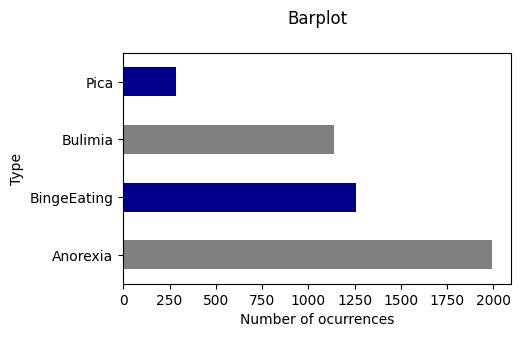

In [53]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,3))
colors = ['grey','darkblue']
df.groupby('Type').Content.count().plot.barh(
    ylim=0, color=colors, title= 'Barplot\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [54]:
df.groupby('Type').Content.count()

Type
Anorexia       1995
BingeEating    1257
Bulimia        1139
Pica            283
Name: Content, dtype: int64

#Break

In [62]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"U0001F600-U0001F64F"  # emoticons
                           u"U0001F300-U0001F5FF"  # symbols & pictographs
                           u"U0001F680-U0001F6FF"  # transport & map symbols
                           u"U0001F1E0-U0001F1FF"  # flags (iOS)
                           u"U00002702-U000027B0"
                           u"U000024C2-U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


df['Content'] = df['Content'].apply(remove_emoji)


In [63]:
df.iloc[4].Content

' finally ate the one food  said if â\x80\x99d be able to do that â\x80\x99d fully beat my relapse... Y   ð\x9f\x98\xadð\x9f\x98\xadð\x9f\x98\xadð\x9f\x98\xadð\x9f\x98\xad  Y    ð\x9f\x98\xadð\x9f\x98\xadð\x9f\x98\xadð\x9f\x98\xadð\x9f\x98\xad â\x80\x99m so proud of myself!  always said  would feel like  beat my relapse if  ate a cheeseburger and today  did! ð\x9f\x98\xadð\x9f\x98\xad itâ\x80\x99s been such a long road! ð\x9f\x98\xad so many times and thoughts about just wanting to give up. t truly does look absolutely beautiful on this side of the fence. lease remember to be kind to yourself & your mental health. â\x80\x99m here for you guys.  just got past my three month mark on eating breakfast and lunch but now â\x80\x99m able to also do three meals. or me to beat this  had to drown out my thoughts.  had to have crunchy food with soft foods to feel like  could do it,  had to have protein meal replacement shakes till i felt comfortable enough to add food into the mix with it. â\x80\

In [65]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII characters
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    stop_words = set(stopwords.words('english'))  # Stopwords
    tokens = [word for word in tokens if word not in stop_words]
    ps = PorterStemmer()  # Stemming
    tokens = [ps.stem(word) for word in tokens]
    return ' '.join(tokens)
# Applying preprocessing to the text column
df['Content'] = df['Content'].apply(preprocess_text)

In [58]:
df.iloc[4].Content

'final ate one food said id abl id fulli beat relaps guy final ate cheeseburg im proud alway said would feel like beat relaps ate cheeseburg today long road mani time thought want give truli look absolut beauti side fenc pleas rememb kind mental health im guy got past three month mark eat breakfast lunch im abl also three meal beat drown thought crunchi food soft food feel like could protein meal replac shake till felt comfort enough add food mix im live proof never give got pleas know im'

In [67]:
df['Content']

0       lil rant btw dont mean asshol sorri come way p...
1                  hit healthi nd ok ere keep go recoveri
2       yr period got back month lot food exercis thou...
3       stori guess use go friend hous lot lunch would...
4       final ate one food said abl fulli beat relaps ...
                              ...                        
4669    even pica f yeah even basic im teen like chew ...
4670    pica recent told friend abt strang eat habit t...
4671    safe altern crave sand year recent found ine t...
4672    cant stop eat hair tie ever sinc kid ive stran...
4673    anyon think cornstarch eat trend complet glori...
Name: Content, Length: 4674, dtype: object

In [68]:
# Separate features (X) and labels (y)
X = df['Content']  # Reddit posts as features
y = df['Type']     # Labels (multi-class categories)

In [69]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Convert text data to numerical features using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [71]:
# Initialize and train a logistic regression model
logreg_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logreg_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [72]:
# Predict the labels on the test set
y_pred = logreg_model.predict(X_test_tfidf)

In [73]:
# Evaluate the model
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

    Anorexia       0.78      0.93      0.85       423
 BingeEating       0.77      0.74      0.75       245
     Bulimia       0.91      0.67      0.77       207
        Pica       1.00      0.72      0.83        60

    accuracy                           0.81       935
   macro avg       0.86      0.76      0.80       935
weighted avg       0.82      0.81      0.80       935



In [74]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


#Ensemble

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

In [91]:
# Create a mapping from class labels to numerical values
class_mapping = {'Anorexia': 0, 'BingeEating': 1, 'Bulimia': 2, 'Pica': 3}

# Create a new 'Category' column with numerical values
df['Category'] = df['Type'].map(class_mapping)

# Separate features (X) and labels (y)
X = df['Content']  # Reddit posts as features
y = df['Type']  # Numerical labels in the 'Category' column


In [92]:
df


,Title,Post Text,ID,Author,Created_utc,Permalink,Eating Disorder,Content,Type,Category
0,*lil rant* btw i donât mean to be an asshole...,please tell me iâm not the only one who find...,yxutx5,Anxious-Enthusiasm-7,2022-11-17 16:38:04,https://reddit.com/r/AnorexiaRecovery/comments...,1,lil rant btw dont mean asshol sorri come way p...,0,NaN
1,I hit a healthy BMI,And Iâm ok with it! Hereâs to keeping goin...,wl2gds,[deleted],2022-08-10 16:52:41,https://reddit.com/r/AnorexiaRecovery/comments...,1,hit healthi nd ok ere keep go recoveri,0,NaN
2,I GOT MY PERIOD BACK !!,"after 2 yrs of no period, i got it back throug...",13hgcir,JokeFit5094,2023-05-14 16:18:17,https://reddit.com/r/AnorexiaRecovery/comments...,1,yr period got back month lot food exercis thou...,0,NaN
3,a story i guess,i used go to my friends house a lot. after lun...,10d1d0s,swagalicious567,2023-01-16 01:32:28,https://reddit.com/r/AnorexiaRecovery/comments...,1,stori guess use go friend hous lot lunch would...,0,NaN
4,I finally ate the one food I said if Iâd be ...,GUYS I DID ITð­ð­ð­ð­ð­ I FINALLY AT...,yasyf3,LaurenAshley1307,2022-10-22 17:04:40,https://reddit.com/r/AnorexiaRecovery/comments...,1,final ate one food said abl fulli beat relaps ...,0,NaN
...,...,...,...,...,...,...,...,...,...,...
4669,"do I even have pica (If yeah, what do I even d...","so basically, i'm a teen. I like to chew on er...",14nthtl,LongLiveGermans,2023-07-01 12:06:48,https://reddit.com/r/pica/comments/14nthtl/do_...,1,even pica f yeah even basic im teen like chew ...,3,NaN
4670,do i have pica?,recently i told some friends abt my strange ea...,14ovzyk,oppressivemoonlight,2023-07-02 18:53:26,https://reddit.com/r/pica/comments/14ovzyk/do_...,1,pica recent told friend abt strang eat habit t...,3,NaN
4671,Is this a safe alternative?,Ive been craving sand for years and recently f...,14rny6h,Impossible_Newt1207,2023-07-05 21:27:25,https://reddit.com/r/pica/comments/14rny6h/is_...,1,safe altern crave sand year recent found ine t...,3,NaN
4672,I canât stop eating hair ties â¦.,ever since i was a kid iâve had the most str...,14rr0es,sugakkyu,2023-07-05 23:24:31,https://reddit.com/r/pica/comments/14rr0es/i_c...,1,cant stop eat hair tie ever sinc kid ive stran...,3,NaN


In [93]:
# Convert text data to numerical features using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [102]:
models = [
    ('SVM', SVC(kernel='linear', C=1.0)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'))
]

In [103]:
# Train and evaluate each model
for name, model in models:
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_rep)
    print("="*40)

Model: SVM
Accuracy: 0.80
              precision    recall  f1-score   support

    Anorexia       0.78      0.90      0.84       423
 BingeEating       0.73      0.73      0.73       245
     Bulimia       0.89      0.66      0.76       207
        Pica       1.00      0.82      0.90        60

    accuracy                           0.80       935
   macro avg       0.85      0.78      0.81       935
weighted avg       0.81      0.80      0.80       935

Model: Random Forest
Accuracy: 0.80
              precision    recall  f1-score   support

    Anorexia       0.76      0.91      0.83       423
 BingeEating       0.76      0.73      0.74       245
     Bulimia       0.93      0.67      0.78       207
        Pica       0.98      0.72      0.83        60

    accuracy                           0.80       935
   macro avg       0.86      0.76      0.80       935
weighted avg       0.81      0.80      0.80       935

Model: Naive Bayes
Accuracy: 0.63
              precision    recall 